In [2]:
#BRIEF INFORMATION ON WHAT THIS PYTHON CODE IS DOING
#This code carries out Exploratory Data Analysis (EDA) to relate the survival of the passenger in titanic
#to different conditions like age, class they belong, amount paid 
#and number of dependents
#It analyzes, identifies patterns, 
#and explores the data. It then models, predicts, solves the problem, 
#and presents the visual, report, and problem-solving solution.
#Some of the library used include pandas, pandas_profiling, numpy, sklearn, seaborn
#matplotlib, dtreeviz
#In summary, the following were carried out
#Read In and Explore the Data
#Data Analysis
#Data Visualization
#Cleaning Data
#Choosing the Best predictive Model

In [3]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [4]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv("train.csv")

# Read CSV test data file into DataFrame
test_df = pd.read_csv("test.csv")

# preview train data
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0]))

The number of samples into the train data is 891.


In [6]:
# preview test data
test_df.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [7]:
print('The number of samples into the test data is {}.'.format(test_df.shape[0]))

The number of samples into the test data is 418.


In [9]:
#Use pandas_profiling to get a quick summaryand insight into data and their 
#relationship that may exist in the variables
import pandas_profiling
train_df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [76]:
#Data Quality & Missing Value Assessment
# check missing values in train data
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
#Age - Missing Values
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))


Percent of missing "Age" records is 19.87%


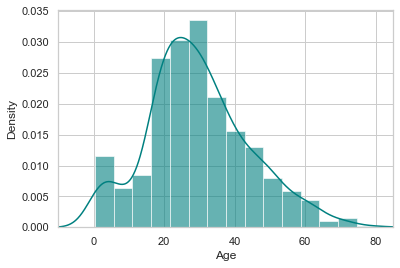

In [78]:
#Let's see what the 'Age' variable looks like in general.

ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [79]:
#Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. 
#To deal with this, we'll use the median to impute the missing values.

# mean age
print('The mean of "Age" is %.2f' %(train_df["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(train_df["Age"].median(skipna=True)))


The mean of "Age" is 29.70
The median of "Age" is 28.00


In [80]:
#Cabin - Missing Values
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))


Percent of missing "Cabin" records is 77.10%


In [81]:
#77% of records are missing, which means that imputing information and using this variable for prediction is probably not wise. 
#We'll ignore this variable in our model.
#Embarked - Missing Values
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))


Percent of missing "Embarked" records is 0.22%


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


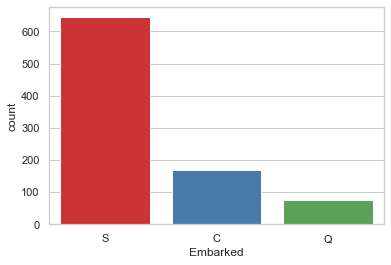

In [82]:
#There are only 2 (0.22%) missing values for "Embarked", 
#so we can just impute with the port where most people boarded.

print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Embarked'].value_counts())
#define Seaborn color palette, you can use bright or pastel
colors = sns.color_palette('bright')[0:5]
sns.countplot(x='Embarked', data=train_df, palette='Set1')
plt.show()

In [83]:
print('The most common boarding port of embarkation is %s.' %train_df['Embarked'].value_counts().idxmax())


The most common boarding port of embarkation is S.


In [84]:
#The most common boarding port of embarkation is S.
#By far the most passengers boarded in Southhampton, 
#so we'll impute those 2 NaN's w/ "S".

#Final Adjustments to Data (Train & Test)
#Let impute 28 (median age) for the missing age
#Let impute with "S" (the most common boarding port) for the missing one.
#Let ignore "Cabin" as a variable. 
#There are too many missing values for imputation, let remove it. 
#Based on the information available, it appears that this value is associated 
#with the passenger's class and fare paid.

train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)


In [85]:
# check missing values in adjusted train data
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [86]:
test_data = test_df.copy()
test_data["Age"].fillna(test_df["Age"].median(skipna=True), inplace=True)
test_data["Embarked"].fillna(test_df['Embarked'].value_counts().idxmax(), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)
test_data["Fare"].fillna(test_df["Fare"].median(skipna=True), inplace=True)
# check missing values in adjusted train data
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [87]:
# preview adjusted train data
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [88]:
print (train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())


   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [89]:
print (train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [90]:
print (train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean())

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


In [91]:
#SibSp and Parch
#With the number of siblings/spouse and the number of children/parents 
#we can create new feature called Family Size.

train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
print (train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [92]:
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

In [93]:
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Embarked  FamilySize  
0  34.5      0      0   330911   7.8292        Q           1  
1  47.0      1      0   363272   7.0000        S           2  
2  62.0      0      0   240276   9.6875        Q           1  
3  27.0      0      0   315154   8.6625        S           1  
4  22.0      1      1  3101298  12.2875        S           3

In [94]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize  
0      0         A/5 21171   7.2500        S           2  
1      0          PC 17599  71.2833        C           2  
2      0  STON/O2. 3101282   7.9250        S           1  
3      0            113803  53.1000        S           2  
4      0            373450   8.0500        S           1

In [95]:
# Fare, we categorize it into 4 ranges.
train_data['CategoricalFare'] = pd.qcut(train_data['Fare'], 4)
print (train_data[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [96]:
#Age
train_data['CategoricalAge'] = pd.cut(train_data['Age'], 5)

print (train_data[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

     CategoricalAge  Survived
0    (0.34, 16.336]  0.550000
1  (16.336, 32.252]  0.344168
2  (32.252, 48.168]  0.404255
3  (48.168, 64.084]  0.434783
4    (64.084, 80.0]  0.090909


In [97]:
#Name
#inside this feature we can find the title of people.
import re as re
def get_title(name):
	title_search = re.search(' ([A-Za-z]+)\.', name)
	# If the title exists, extract and return it.
	if title_search:
		return title_search.group(1)
	return ""

train_data['Title'] = train_data['Name'].apply(get_title)

print(pd.crosstab(train_data['Title'], train_data['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [98]:
#so we have titles. let's categorize it and check the title impact on survival rate.
print (train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

       Title  Survived
0       Capt  0.000000
1        Col  0.500000
2   Countess  1.000000
3        Don  0.000000
4         Dr  0.428571
5   Jonkheer  0.000000
6       Lady  1.000000
7      Major  0.500000
8     Master  0.575000
9       Miss  0.697802
10      Mlle  1.000000
11       Mme  1.000000
12        Mr  0.156673
13       Mrs  0.792000
14        Ms  1.000000
15       Rev  0.000000
16       Sir  1.000000


In [99]:
#so we have titles. let's categorize it and check the title impact on survival rate.
train_data['Title'] = train_data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')
print (train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [100]:
#so we have titles. let's categorize it and check the title impact on survival rate.
test_data['Title'] = test_data['Name'].apply(get_title)
test_data['Title'] = test_data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_data['Title'] = test_data['Title'].replace('Mlle', 'Miss')
test_data['Title'] = test_data['Title'].replace('Ms', 'Miss')
test_data['Title'] = test_data['Title'].replace('Mme', 'Mrs')
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Embarked  FamilySize Title  
0  34.5      0      0   330911   7.8292        Q           1    Mr  
1  47.0      1      0   363272   7.0000        S           2   Mrs  
2  62.0      0      0   240276   9.6875        Q           1    Mr  
3  27.0      0      0   315154   8.6625        S           1    Mr  
4  22.0      1      1  3101298  12.2875        S           3   Mrs

In [101]:
#Copy the clean data for another set of analysis
dataset = train_data.copy()
test = test_data.copy()
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Embarked  FamilySize Title  
0  34.5      0      0   330911   7.8292        Q           1    Mr  
1  47.0      1      0   363272   7.0000        S           2   Mrs  
2  62.0      0      0   240276   9.6875        Q           1    Mr  
3  27.0      0      0   315154   8.6625        S           1    Mr  
4  22.0      1      1  3101298  12.2875        S           3   Mrs

In [102]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize  CategoricalFare  \
0      0         A/5 21171   7.2500        S           2   (-0.001, 7.91]   
1      0          PC 17599  71.2833        C           2  (31.0, 512.329]   
2      0  STON/O2. 3101282   7.9250        S           1   (7.91, 14.454]   
3      0            113803  53.1000        S           2  (31.0, 512.329]   
4      0            373450   8.0500        S           1   (7.91, 14.454]   

     CategoricalAge Title  
0  (16.336, 32.252]    Mr  
1  (32.252, 48.168]   Mrs  
2  (16.336, 32.252]  Miss  
3  (32.252, 48.168]   Mrs  
4  (32.252, 48.168]    Mr

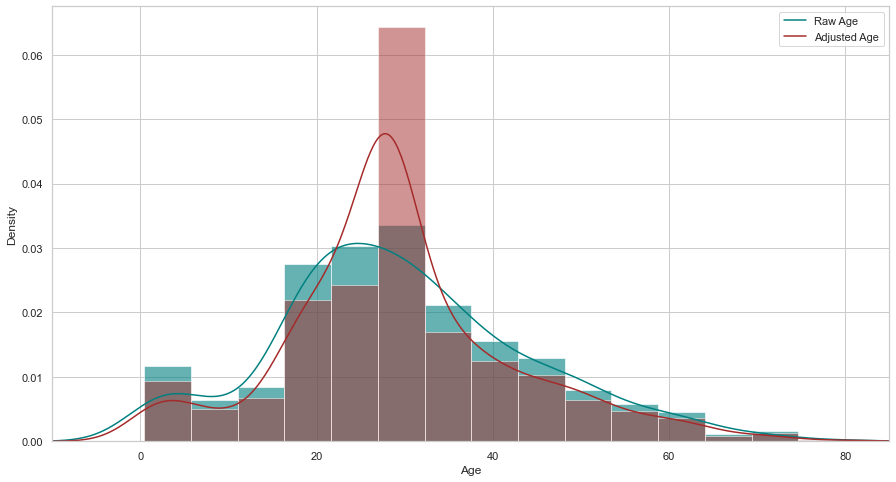

In [103]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='brown', alpha=0.5)
train_data["Age"].plot(kind='density', color='brown')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [104]:
#Additional Variables
#both SibSp and Parch relate to traveling with family.
#combine the effect of these variables into one categorical predictor: 
#whether or not that individual was traveling alone.
## Create categorical variable for traveling alone
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  \
0                            Braund, Mr. Owen Harris    male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2                             Heikkinen, Miss. Laina  female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4                           Allen, Mr. William Henry    male  35.0   

             Ticket     Fare Embarked  FamilySize  CategoricalFare  \
0         A/5 21171   7.2500        S           2   (-0.001, 7.91]   
1          PC 17599  71.2833        C           2  (31.0, 512.329]   
2  STON/O2. 3101282   7.9250        S           1   (7.91, 14.454]   
3            113803  53.1000        S           2  (31.0, 512.329]   
4            373450   8.0500        S           1   (7.91, 14.454]   

     CategoricalAge Title  TravelAlone  
0  (16.336, 32.252]    Mr            0  
1  (32.252, 48.168]   Mrs            0  
2  (16.336, 32.252]  Miss            1  
3  (32.252, 48.168]   Mrs            0  
4  (32.252, 48.168]    Mr            1

In [105]:
#create categorical variables for Passenger Class ("Pclass"), Gender ("Sex"), 
#and Port Embarked ("Embarked").
#create categorical variables and drop some variables
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

Survived   Age     Fare  FamilySize  CategoricalFare    CategoricalAge  \
0         0  22.0   7.2500           2   (-0.001, 7.91]  (16.336, 32.252]   
1         1  38.0  71.2833           2  (31.0, 512.329]  (32.252, 48.168]   
2         1  26.0   7.9250           1   (7.91, 14.454]  (16.336, 32.252]   
3         1  35.0  53.1000           2  (31.0, 512.329]  (32.252, 48.168]   
4         0  35.0   8.0500           1   (7.91, 14.454]  (32.252, 48.168]   

  Title  TravelAlone  Pclass_1  Pclass_2  Pclass_3  Embarked_C  Embarked_Q  \
0    Mr            0         0         0         1           0           0   
1   Mrs            0         1         0         0           1           0   
2  Miss            1         0         0         1           0           0   
3   Mrs            0         1         0         0           0           0   
4    Mr            1         0         0         1           0           0   

   Embarked_S  Sex_male  
0           1         1  
1           0         0  
2           1         0  
3           1         0  
4           1         1

In [106]:
test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

Age     Fare  FamilySize Title  TravelAlone  Pclass_1  Pclass_2  Pclass_3  \
0  34.5   7.8292           1    Mr            1         0         0         1   
1  47.0   7.0000           2   Mrs            0         0         0         1   
2  62.0   9.6875           1    Mr            1         0         1         0   
3  27.0   8.6625           1    Mr            1         0         0         1   
4  22.0  12.2875           3   Mrs            0         0         0         1   

   Embarked_C  Embarked_Q  Embarked_S  Sex_male  
0           0           1           0         1  
1           0           0           1         0  
2           0           1           0         1  
3           0           0           1         1  
4           0           0           1         0

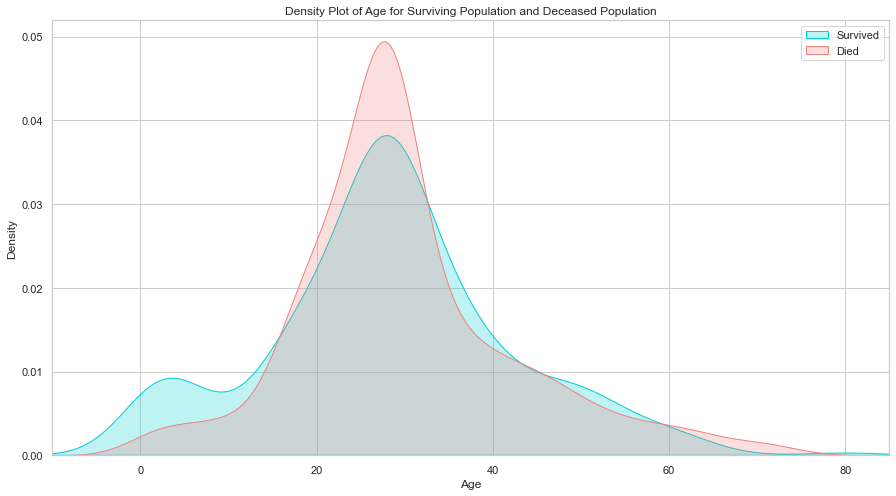

In [107]:
#3. Exploratory Data Analysis
#3.1. Exploration of Age
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

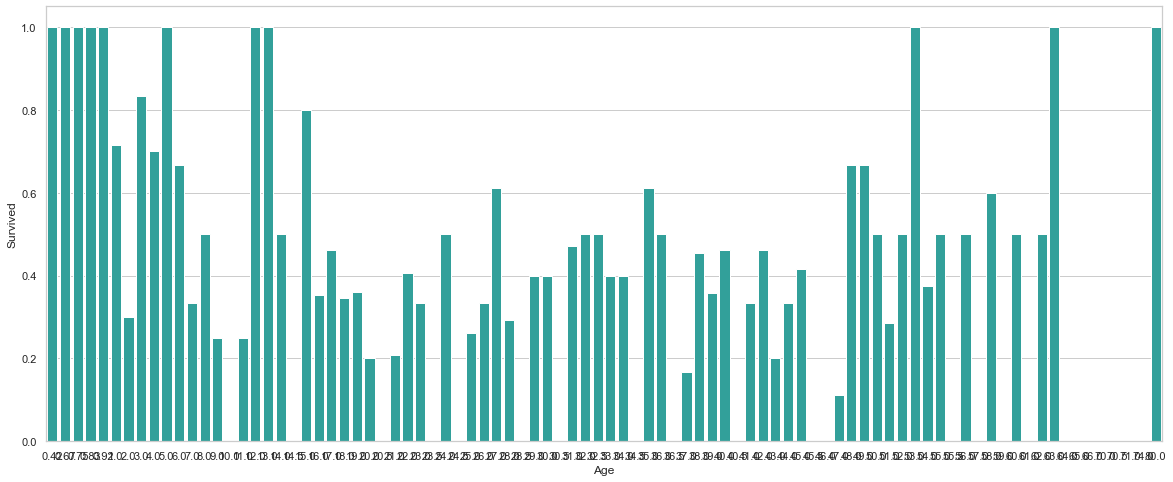

In [108]:
#One notable difference is that, of the survivors, a larger proportion were children. 
#The passengers evidently made an attempt to save children by giving 
#them a place on the life rafts.

plt.figure(figsize=(20,8))
avg_survival_byage = final_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()


In [109]:
#Considering the survival rate of passengers under 16, 
#Let include another categorical variable in the dataset called "Minor"

final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)

final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)
final_train.head()

Survived   Age     Fare  FamilySize  CategoricalFare    CategoricalAge  \
0         0  22.0   7.2500           2   (-0.001, 7.91]  (16.336, 32.252]   
1         1  38.0  71.2833           2  (31.0, 512.329]  (32.252, 48.168]   
2         1  26.0   7.9250           1   (7.91, 14.454]  (16.336, 32.252]   
3         1  35.0  53.1000           2  (31.0, 512.329]  (32.252, 48.168]   
4         0  35.0   8.0500           1   (7.91, 14.454]  (32.252, 48.168]   

  Title  TravelAlone  Pclass_1  Pclass_2  Pclass_3  Embarked_C  Embarked_Q  \
0    Mr            0         0         0         1           0           0   
1   Mrs            0         1         0         0           1           0   
2  Miss            1         0         0         1           0           0   
3   Mrs            0         1         0         0           0           0   
4    Mr            1         0         0         1           0           0   

   Embarked_S  Sex_male  IsMinor  
0           1         1        0  
1           0         0        0  
2           1         0        0  
3           1         0        0  
4           1         1        0

In [110]:
final_test.head()

Age     Fare  FamilySize Title  TravelAlone  Pclass_1  Pclass_2  Pclass_3  \
0  34.5   7.8292           1    Mr            1         0         0         1   
1  47.0   7.0000           2   Mrs            0         0         0         1   
2  62.0   9.6875           1    Mr            1         0         1         0   
3  27.0   8.6625           1    Mr            1         0         0         1   
4  22.0  12.2875           3   Mrs            0         0         0         1   

   Embarked_C  Embarked_Q  Embarked_S  Sex_male  IsMinor  
0           0           1           0         1        0  
1           0           0           1         0        0  
2           0           1           0         1        0  
3           0           0           1         1        0  
4           0           0           1         0        0

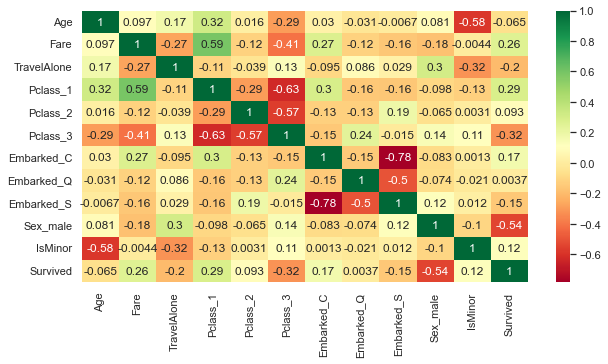

In [111]:
Selected_features1 = ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 
                      'Embarked_Q', 'Embarked_S', 'Sex_male', 'IsMinor', 'Survived']
Xx = final_train[Selected_features1]

plt.subplots(figsize=(10, 5))
sns.heatmap(Xx.corr(), annot=True, cmap="RdYlGn")
plt.show()

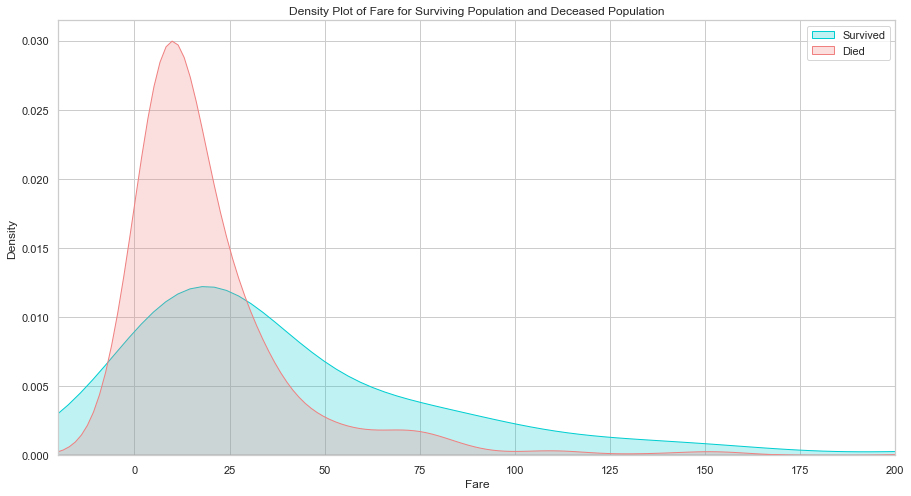

In [112]:
#Exploration of Fare
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

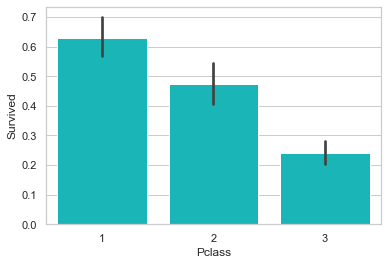

In [113]:
#Passengers who paid lower fare appear to have been less likely to survive. 
#This is probably strongly correlated with Passenger Class, which we'll look at next.
#Exploration of Passenger Class
sns.barplot('Pclass', 'Survived', data=train_df, color="darkturquoise")
plt.show()


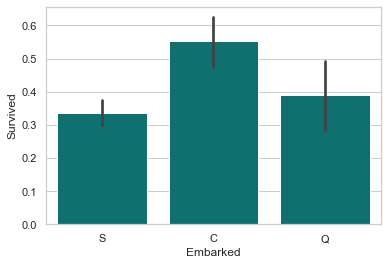

In [114]:
#Exploration of Embarked Port
sns.barplot('Embarked', 'Survived', data=train_df, color="teal")
plt.show()

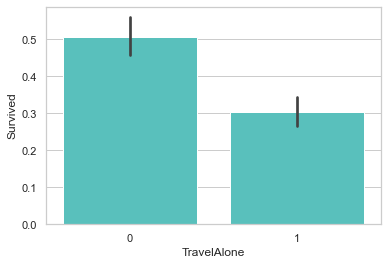

In [115]:
#Passengers who boarded in Southhampton were marginally less likely to survive 
#than those who boarded in Queenstown. 
#It's also worth noting the size of the whiskers in these plots. 
#The whisker of the Queenstown plot includes the Southhampton average, 
#as well as the lower bound of its whisker. 
#It's possible that Queenstown passengers were equally, or even more, 
#ill-fated than their Southhampton counterparts.
#Exploration of Traveling Alone vs. With Family
sns.barplot('TravelAlone', 'Survived', data=final_train, color="mediumturquoise")
plt.show()

In [116]:
final_train.head()

Survived   Age     Fare  FamilySize  CategoricalFare    CategoricalAge  \
0         0  22.0   7.2500           2   (-0.001, 7.91]  (16.336, 32.252]   
1         1  38.0  71.2833           2  (31.0, 512.329]  (32.252, 48.168]   
2         1  26.0   7.9250           1   (7.91, 14.454]  (16.336, 32.252]   
3         1  35.0  53.1000           2  (31.0, 512.329]  (32.252, 48.168]   
4         0  35.0   8.0500           1   (7.91, 14.454]  (32.252, 48.168]   

  Title  TravelAlone  Pclass_1  Pclass_2  Pclass_3  Embarked_C  Embarked_Q  \
0    Mr            0         0         0         1           0           0   
1   Mrs            0         1         0         0           1           0   
2  Miss            1         0         0         1           0           0   
3   Mrs            0         1         0         0           0           0   
4    Mr            1         0         0         1           0           0   

   Embarked_S  Sex_male  IsMinor  
0           1         1        0  
1           0         0        0  
2           1         0        0  
3           1         0        0  
4           1         1        0

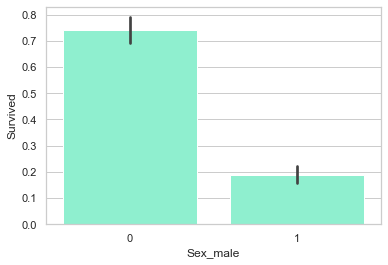

In [117]:
#Individuals traveling without family were more likely to die in the disaster 
#than those with family aboard. 
#Given the era, it's likely that individuals traveling alone were likely male.
#Exploration of Gender Variable
sns.barplot('Sex_male', 'Survived', data=final_train, color="aquamarine")
plt.show()
#This is a very obvious difference. Clearly being female greatly increased your chances of survival.


In [118]:
#Format Title, Age and Fare by groups because you can not use a data that changes 
#at every row to 
#test a classifier that works better on the dataset
dataset2 = final_train.copy()

# Mapping titles
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
dataset2['Title'] = dataset2['Title'].map(title_mapping)
dataset2['Title'] = dataset2['Title'].fillna(0)

# Mapping Fare
dataset2.loc[ dataset2['Fare'] <= 7.91, 'Fare'] 						       = 0
dataset2.loc[(dataset2['Fare'] > 7.91) & (dataset2['Fare'] <= 14.454), 'Fare'] = 1
dataset2.loc[(dataset2['Fare'] > 14.454) & (dataset2['Fare'] <= 31), 'Fare']   = 2
dataset2.loc[ dataset2['Fare'] > 31, 'Fare'] 							       = 3
dataset2['Fare'] = dataset2['Fare'].astype(int)

# Mapping Age
dataset2.loc[ dataset2['Age'] <= 16, 'Age'] 					      = 0
dataset2.loc[(dataset2['Age'] > 16) & (dataset2['Age'] <= 32), 'Age'] = 1
dataset2.loc[(dataset2['Age'] > 32) & (dataset2['Age'] <= 48), 'Age'] = 2
dataset2.loc[(dataset2['Age'] > 48) & (dataset2['Age'] <= 64), 'Age'] = 3
dataset2.loc[ dataset2['Age'] > 64, 'Age']                            = 4

dataset2.head()

Survived  Age  Fare  FamilySize  CategoricalFare    CategoricalAge  Title  \
0         0  1.0     0           2   (-0.001, 7.91]  (16.336, 32.252]      1   
1         1  2.0     3           2  (31.0, 512.329]  (32.252, 48.168]      3   
2         1  1.0     1           1   (7.91, 14.454]  (16.336, 32.252]      2   
3         1  2.0     3           2  (31.0, 512.329]  (32.252, 48.168]      3   
4         0  2.0     1           1   (7.91, 14.454]  (32.252, 48.168]      1   

   TravelAlone  Pclass_1  Pclass_2  Pclass_3  Embarked_C  Embarked_Q  \
0            0         0         0         1           0           0   
1            0         1         0         0           1           0   
2            1         0         0         1           0           0   
3            0         1         0         0           0           0   
4            1         0         0         1           0           0   

   Embarked_S  Sex_male  IsMinor  
0           1         1        0  
1           0         0        0  
2           1         0        0  
3           1         0        0  
4           1         1        0

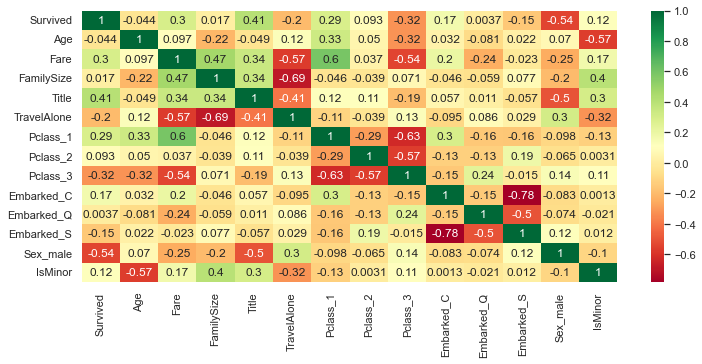

In [119]:
#Check the cross correlation of the data variables
Selected_features = ['Survived', 'Age', 'Fare', 'FamilySize', 'Title', 'TravelAlone', 
                     'Pclass_1', 'Pclass_2', 
                     'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 
                     'Sex_male', 'IsMinor']
X = dataset2[Selected_features]

plt.subplots(figsize=(12, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

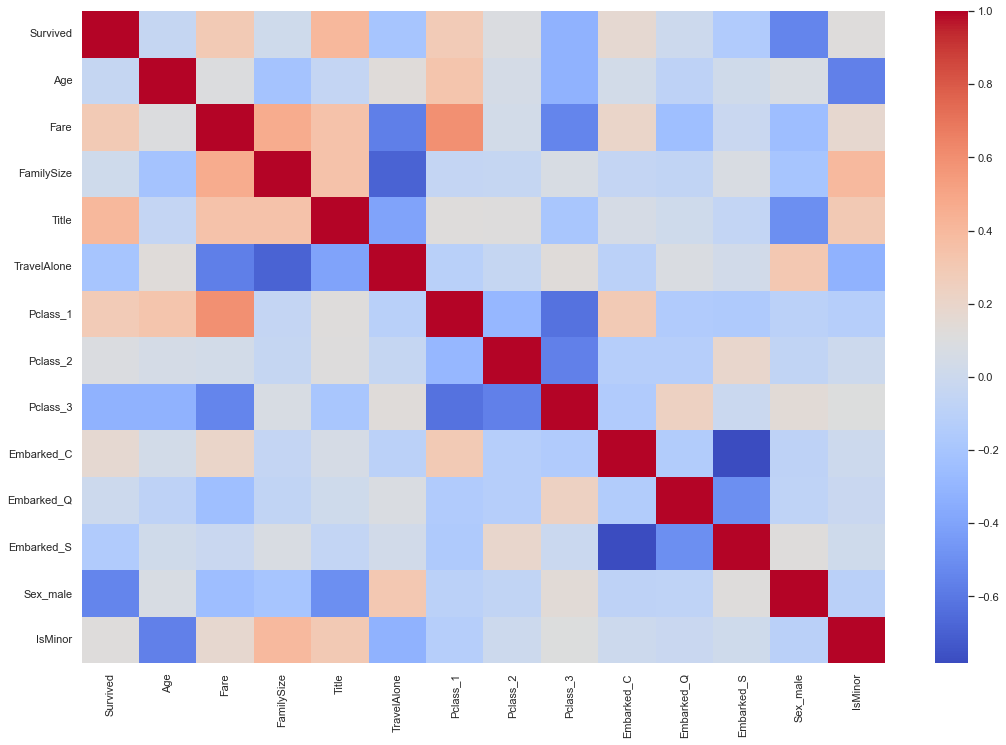

In [120]:
fig = plt.figure(figsize=(18,12))
ax = plt.subplot(1,1,1)
color=sns.color_palette("dark")
sns.heatmap(X.corr(),ax= ax, cmap='coolwarm', color=color);

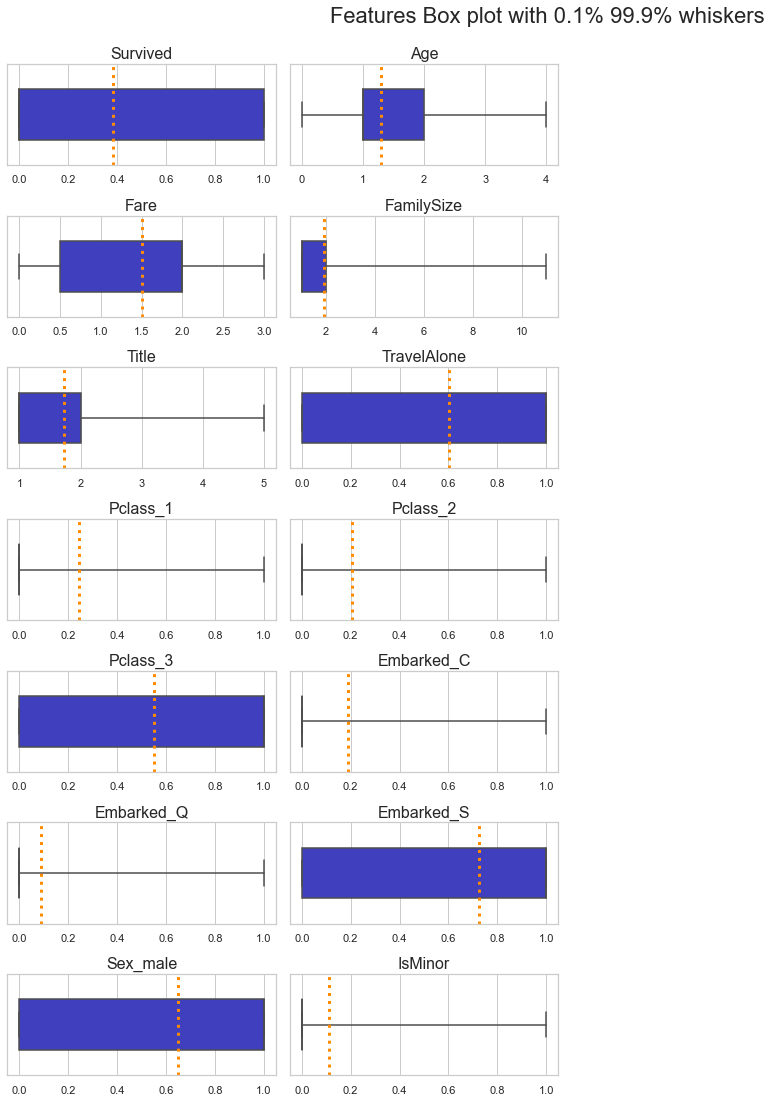

In [121]:
#The following code will make a grid of horizontal box plot with the mean ploted too 
#to get a comprehensive solid understanding of the features distributions
#Using customized 0.1%:99.9% whisker to show extreme outliers 
#since the data is strongly centered.
#If majority of values are heavily centerd around the mean, 
#then fill null values using the mean, otherwise use media.
#The plot can be useful to know what best to use either mean or median
import gc
import matplotlib.gridspec as gridspec
import sys
fig = plt.figure(figsize=(20,80))
fig.suptitle('Features Box plot with 0.1% 99.9% whiskers',fontsize=22, y=.89)
grid =  gridspec.GridSpec(29,4,figure=fig,hspace=.5,wspace=.05)
featstr = [i for i in X.columns[0:]]
counter = 0
for i in range(7):
    for j in range(2):
        subf = fig.add_subplot(grid[i, j]);
        sns.boxplot(x= X[featstr[counter]],saturation=.5,color= 'blue', ax= subf,width=.5,whis=(.1,99.9));
        subf.axvline(X[featstr[counter]].mean(),color= 'darkorange', label='Mean', linestyle=':',linewidth=3)
        subf.set_xlabel('')
        subf.set_title('{}'.format(featstr[counter]),fontsize=16)
        counter += 1
        gc.collect()
plt.show();
#You can use either mean or median

<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

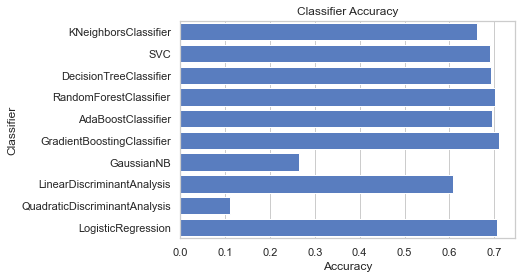

In [122]:
#good! now we have a clean dataset and ready to predict. 
#let's find which classifier works better on this dataset.
#Classifier Comparison
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

#Copy only the values of the last data modified
cols = ["Age", "Fare", "Title", "TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_Q", "Embarked_S","Sex_male","IsMinor"] 
Xx = dataset2[cols]
#yy = dataset2['Survived']
train2 = Xx.values

X = train2[0::, 1::]
y = train2[0::, 0]

acc_dict = {}

for train_index, test_index in sss.split(X, y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	
	for clf in classifiers:
		name = clf.__class__.__name__
		clf.fit(X_train, y_train)
		train_predictions = clf.predict(X_test)
		acc = accuracy_score(y_test, train_predictions)
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [123]:
#The Logistic above shows that many classifiers behaves very well especially LogisticRegression
#Logistic Regression and Results
#Feature selection
#Recursive feature elimination¶
#Given an external estimator that assigns weights to features, recursive 
#feature elimination (RFE) is to select features by recursively considering smaller 
#and smaller sets of features. 
#That procedure is recursively repeated on the pruned set until the desired 
#number of features to select is eventually reached.
#http://scikit-learn.org/stable/modules/feature_selection.html
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["Age", "Fare", "Title", "TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_Q", "Embarked_S","Sex_male","IsMinor"]

X = dataset2[cols]
y = dataset2['Survived']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, n_features_to_select=8, step=1)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))
print('Train R\u00b2 =  %.3f' % (rfe.score(X, y)))


Selected features: ['Age', 'Title', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_S', 'Sex_male', 'IsMinor']
Train R² =  0.808


Optimal number of features: 9
Selected features: ['Age', 'Title', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


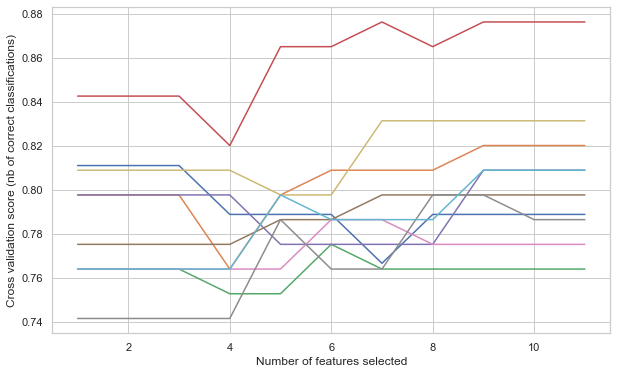

In [124]:
#Feature ranking with recursive feature elimination and cross-validation
#RFECV performs RFE in a cross-validation loop to find the optimal number or 
#the best number of features. 
from sklearn.feature_selection import RFECV
from sklearn.svm import  SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
#The scoring can be "roc_auc", "accuracy" which may be better than "neg_log_loss"
svc = SVC(kernel="linear") #It SVC is too memory demanding, LogisticRegression() is faster

cols = ["Age", "Fare", "Title", "TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_Q", "Embarked_S","Sex_male","IsMinor"]

X = dataset2[cols]
y = dataset2['Survived']

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy', min_features_to_select = 1)
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))
#Selected_features = list(X.columns[rfecv.support_])
#print(Selected_features)
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Train/Test split results:
LogisticRegression accuracy is 0.788
LogisticRegression log_loss is 0.504
LogisticRegression auc is 0.843
Train R² =  0.819
Test R² =  0.788
[[-0.47607578  0.42681932  0.16217552  2.08382137  1.21619966  0.17971932
  -0.33464308 -2.20739447  0.18543073]]
The Intercept is [-0.17344265]


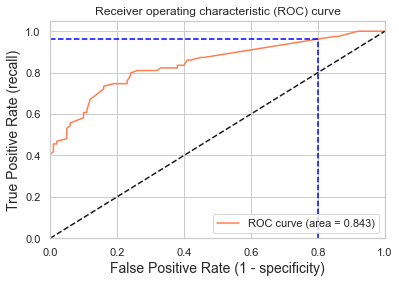

Using a threshold of 0.069 guarantees a sensitivity of 0.962 and a specificity of 0.200, i.e. a false positive rate of 80.00%.


In [125]:
#Model evaluation based on simple train/test split using train_test_split() function
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
cols = ['Age', 'Title', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']
X = dataset2[cols]
y = dataset2['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

print('Train R\u00b2 =  %.3f' % (logreg.score(X_train, y_train)))
print('Test R\u00b2 =  %.3f' % (logreg.score(X_test, y_test)))
print(logreg.coef_)
print(f'The Intercept is {logreg.intercept_}')

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [126]:
#Model evaluation based on K-fold cross-validation using cross_val_score() function
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, 
#it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.807
LogisticRegression average log_loss is 0.447
LogisticRegression average auc is 0.859


In [127]:
#Model evaluation based on K-fold cross-validation using cross_validate() function
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.807 (+/-0.030)
LogisticRegression average log_loss: 0.447 (+/-0.043)
LogisticRegression average auc: 0.859 (+/-0.032)


In [128]:
#What happens when we add the feature "Fare"?

cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"]
X = final_train[cols]

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, final_train[cols], y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.799 (+/-0.028)
LogisticRegression average log_loss: 0.455 (+/-0.037)
LogisticRegression average auc: 0.849 (+/-0.028)


best params: LogisticRegression(C=0.60001)
best params: {'C': 0.60001}
best score: 0.8069787765293382


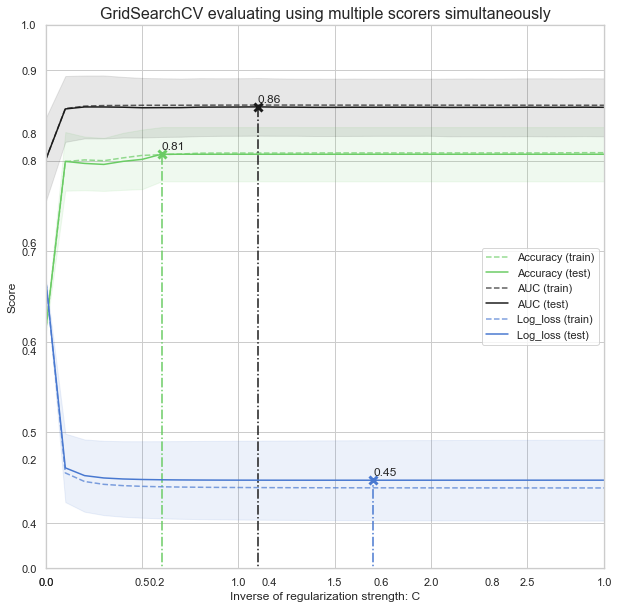

In [129]:
#GridSearchCV evaluating using multiple scorers simultaneously
from sklearn.model_selection import GridSearchCV
cols = ['Age', 'Title', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']

X = dataset2[cols]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

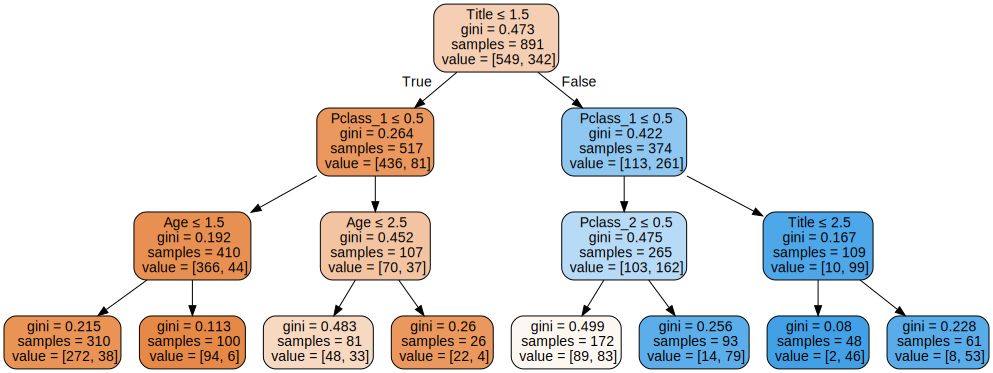

In [130]:
#Let's see how our tree grew! 
#What were the splits the model identified as being most significant in this 
#classification task?
#The impurity is the measure as given at the top by Gini, 
#the samples are the number of observations remaining to classify and the value is 
#the how many samples are in class 0 (Did not survive) and how many samples 
#are in class 1 (Survived).
#Resources:
#http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 
#http://benalexkeen.com/decision-tree-classifier-in-python-using-scikit-learn/ 
#https://en.wikipedia.org/wiki/Pruning_(decision_trees)
            
import graphviz 
from sklearn import tree
tree1 = tree.DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=3, min_samples_leaf=20)

#cols=["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
cols = ['Age', 'Title', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']

X_DT=dataset2[cols]
Y_DT=dataset2['Survived']

tree1.fit(X_DT, Y_DT)

tree1_view = tree.export_graphviz(tree1, out_file=None, feature_names = X_DT.columns.values, 
                                  filled=True, rounded=True, special_characters=True) 
tree1viz = graphviz.Source(tree1_view)
tree1viz


In [131]:
#To save the image
tree1viz.render(directory='image', view=True)  

'image/Source.gv.pdf'

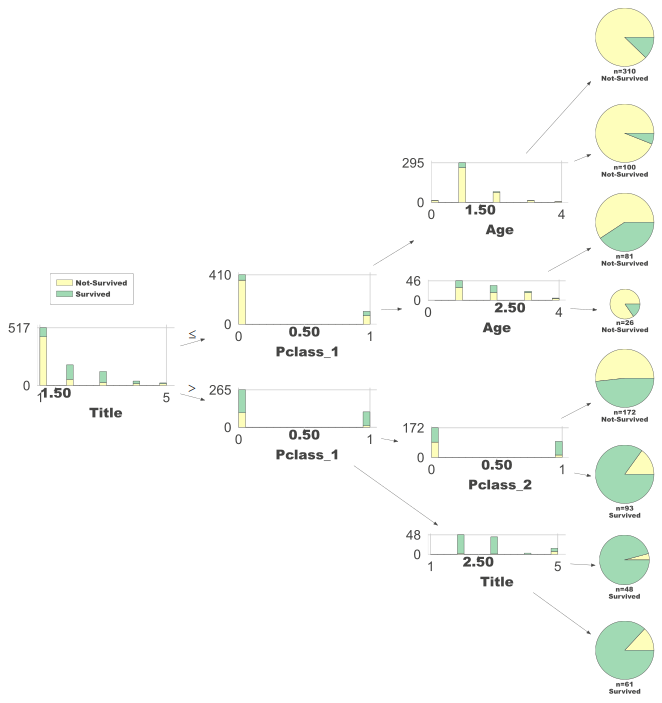

In [132]:
#Plot Decision Tree with dtreeviz Package
from dtreeviz.trees import dtreeviz
import graphviz 
from sklearn import tree
tree2 = tree.DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=3, min_samples_leaf=20)

#cols=["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
cols = ['Age', 'Title', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']

X_DT=dataset2[cols]
Y_DT=dataset2['Survived']

model = tree2.fit(X_DT, Y_DT)
#X = X_DT[np.random.randint(0, len(X_DT)),:]

#You can use different orientation LR or UD
#You cal also use histtype='bar' or barstacked
tree2_view = dtreeviz(tree2, X_DT, Y_DT, feature_names = X_DT.columns.values, 
              class_names=['Not-Survived', 'Survived'], 
                      histtype= 'barstacked', orientation='LR',
                     label_fontsize=18, ticks_fontsize = 18, 
                      title_fontsize=20, scale=1.0, fontname='Arial Black',
                     show_node_labels = False) 

tree2_view


In [133]:
#Save the dtreeviz image to file
tree2_view.save('dtreeviz.svg')

In [134]:
#Taking our previously Cleaning Data
#Now let's clean our data and map our features into numerical values.
dataset.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize  CategoricalFare  \
0      0         A/5 21171   7.2500        S           2   (-0.001, 7.91]   
1      0          PC 17599  71.2833        C           2  (31.0, 512.329]   
2      0  STON/O2. 3101282   7.9250        S           1   (7.91, 14.454]   
3      0            113803  53.1000        S           2  (31.0, 512.329]   
4      0            373450   8.0500        S           1   (7.91, 14.454]   

     CategoricalAge Title  
0  (16.336, 32.252]    Mr  
1  (32.252, 48.168]   Mrs  
2  (16.336, 32.252]  Miss  
3  (32.252, 48.168]   Mrs  
4  (32.252, 48.168]    Mr

In [135]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Embarked  FamilySize Title  
0  34.5      0      0   330911   7.8292        Q           1    Mr  
1  47.0      1      0   363272   7.0000        S           2   Mrs  
2  62.0      0      0   240276   9.6875        Q           1    Mr  
3  27.0      0      0   315154   8.6625        S           1    Mr  
4  22.0      1      1  3101298  12.2875        S           3   Mrs

In [136]:
# Mapping Sex
dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# Mapping titles
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
dataset['Title'] = dataset['Title'].map(title_mapping)
dataset['Title'] = dataset['Title'].fillna(0)

# Mapping Embarked
dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

# Mapping Fare
dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
dataset['Fare'] = dataset['Fare'].astype(int)

# Mapping Age
dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4

# Feature Selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'FamilySize']
train = dataset.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)


In [137]:
print(train.head())

   Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Title
0         0       3    1  1.0      1      0     0         0      1
1         1       1    0  2.0      1      0     3         1      3
2         1       3    0  1.0      0      0     1         0      2
3         1       1    0  2.0      1      0     3         0      3
4         0       3    1  2.0      0      0     1         0      1


In [138]:
test  = test.drop(drop_elements, axis = 1)
test['Sex'] = test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
test['Title'] = test['Title'].map(title_mapping)
test['Title'] = test['Title'].fillna(0)

# Mapping Fare
test.loc[ test['Fare'] <= 7.91, 'Fare'] 						   = 0
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Fare'] = 1
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare']   = 2
test.loc[ test['Fare'] > 31, 'Fare'] 							   = 3
test['Fare'] = test['Fare'].astype(int)

# Mapping Age
test.loc[ test['Age'] <= 16, 'Age'] 					  = 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 32), 'Age'] = 1
test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'Age'] = 2
test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'Age'] = 3
test.loc[ test['Age'] > 64, 'Age']                        = 4



In [139]:
print(test.head())

   Pclass  Sex  Age  SibSp  Parch  Fare Embarked  Title
0       3    1  2.0      0      0     0        Q      1
1       3    0  2.0      1      0     0        S      3
2       2    1  3.0      0      0     1        Q      1
3       3    1  1.0      0      0     1        S      1
4       3    0  1.0      1      1     1        S      3


<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

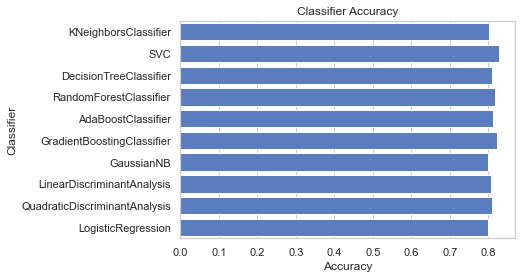

In [140]:
#good! now we have a clean dataset and ready to predict. 
#let's find which classifier works better on this dataset.
#Classifier Comparison
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

#Copy only the values of the last data modified
train1 = train.values
test1  = test.values

X = train1[0::, 1::]
y = train1[0::, 0]

acc_dict = {}

for train_index, test_index in sss.split(X, y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	
	for clf in classifiers:
		name = clf.__class__.__name__
		clf.fit(X_train, y_train)
		train_predictions = clf.predict(X_test)
		acc = accuracy_score(y_test, train_predictions)
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [141]:
X

array([[3., 1., 1., ..., 0., 0., 1.],
       [1., 0., 2., ..., 3., 1., 3.],
       [3., 0., 1., ..., 1., 0., 2.],
       ...,
       [3., 0., 1., ..., 2., 0., 2.],
       [1., 1., 1., ..., 2., 1., 1.],
       [3., 1., 1., ..., 0., 2., 1.]])